In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

## Read the data

In [20]:
df = pd.read_excel('innercity.xlsx')

In [21]:
pd.set_option('display.max_columns', 500)

In [22]:
# checking the first 5 rows of the data
sample_df = df.head()
sample_df

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0     1966             0    98034  47.7228 -122.183            2020.0   
1     1948             0    98118  47.5546 -122.274            1660.0   
2     1966             0    98118  47.5188 -122.256            2620.0   
3     2009             0    98002  47.3363 -122.213            2030.0   
4     1924             0    98118  47.5663 -122.285            1120.0   

   lot_measure15  furnished total_area  
0         8660.0        0.0      12490  
1         4100.0        0.0       3771  
2         2433.0        0.0       5455  
3         3794.0        0.0       5461  
4         5100.0        0.0       5710

In [23]:
dfi.export(sample_df, 'rough_sample_df.png')

In [24]:
# checking the shape of the data
df.shape

(21613, 23)

In [25]:
# checking the columns of the data
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [26]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [27]:
# Treating BAD VALUES
# some objects appear to be of object data type but they should have been of 
# numeric data type. This is because of invalid input '$' and 'isna'
lst = ['ceil', 'coast', 'condition', 'yr_built', 'total_area']

for item in lst:
    print(item)
    print(df[item].value_counts())
    print('------------------')

ceil
1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64
------------------
coast
0    21421
1      161
$       30
Name: coast, dtype: int64
------------------
condition
3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: condition, dtype: int64
------------------
yr_built
2014    559
2006    454
2005    450
2004    433
2003    421
       ... 
1901     29
1902     27
1935     24
1934     21
$        14
Name: yr_built, Length: 117, dtype: int64
------------------
total_area
$         39
9820      19
6770      19
5940      19
8750      19
          ..
39190      1
6421       1
153875     1
6417       1
16380      1
Name: total_area, Length: 11145, dtype: int64
------------------


In [28]:
for item in lst:
    print(item)
    print(df[item].isna().sum())
    print('----------')

ceil
42
----------
coast
1
----------
condition
57
----------
yr_built
1
----------
total_area
29
----------


In [34]:
lst = ['ceil', 'coast', 'condition', 'yr_built', 'total_area']
for item in lst:
    df[item].replace('$', np.NaN, inplace = True)
    df[item].replace('isna', np.NaN, inplace=True)

In [35]:
lst = ['ceil', 'coast', 'condition', 'yr_built', 'total_area']
for item in lst:
    df[item].astype('float64')

In [36]:
# Checking on the columns again

lst = ['ceil', 'coast', 'condition', 'yr_built', 'total_area']

for item in lst:
    print(item)
    print(df[item].value_counts())
    print('------------------')

ceil
1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64
------------------
coast
0.0    21421
1.0      161
Name: coast, dtype: int64
------------------
condition
3.0    13978
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: condition, dtype: int64
------------------
yr_built
2014.0    559
2006.0    454
2005.0    450
2004.0    433
2003.0    421
         ... 
1933.0     30
1901.0     29
1902.0     27
1935.0     24
1934.0     21
Name: yr_built, Length: 116, dtype: int64
------------------
total_area
8750.0     19
6770.0     19
9060.0     19
5940.0     19
7330.0     19
           ..
45264.0     1
9044.0      1
18309.0     1
7761.0      1
14750.0     1
Name: total_area, Length: 11144, dtype: int64
------------------


In [37]:
# once again retrieving info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [38]:
# describing the data set
desc_data = df.describe().T
desc_data

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21505.0  3.371355e+00  9.302886e-01  0.000000e+00   
room_bath         21505.0  2.115171e+00  7.702481e-01  0.000000e+00   
living_measure    21596.0  2.079861e+03  9.184961e+02  2.900000e+02   
lot_measure       21571.0  1.510458e+04  4.142362e+04  5.200000e+02   
ceil              21541.0  1.494127e+00  5.399116e-01  1.000000e+00   
coast             21582.0  7.459920e-03  8.605006e-02  0.000000e+00   
sight             21556.0  2.343663e-01  7.664376e-01  0.000000e+00   
condition         21528.0  3.409327e+00  6.507089e-01  1.000000e+00   
quality           21612.0  7.656857e+00  1.175484e+00  1.000000e+00   
ceil_measure      21612.0  1.788367e+03  8.281025e+02  2.900000e+02   
basement          21612.0  2.915225e+02  4.425808e+02  0.000000e+00   
yr_built          21598.0  1.971009e+03  2.937344e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
living_measure15  21447.0  1.987066e+03  6.855196e+02  3.990000e+02   
lot_measure15     21584.0  1.276654e+04  2.728699e+04  6.510000e+02   
furnished         21584.0  1.967198e-01  3.975279e-01  0.000000e+00   
total_area        21545.0  1.719204e+04  4.162869e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.429250e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068450e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.032000e+03  9.575000e+03  1.300000e+04  1.652659e+06

In [39]:
dfi.export(desc_data, 'rough_desc_data.png')

In [40]:
# Treating the missing values
# Checking for Missing/Null Values
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [41]:
df.isnull().sum().sort_values(ascending = False)

living_measure15    166
room_bed            108
room_bath           108
condition            85
ceil                 72
total_area           68
sight                57
lot_measure          42
coast                31
furnished            29
lot_measure15        29
living_measure       17
yr_built             15
quality               1
basement              1
ceil_measure          1
yr_renovated          0
zipcode               0
lat                   0
long                  0
dayhours              0
price                 0
cid                   0
dtype: int64

In [42]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

living_measure15    166
room_bed            108
room_bath           108
condition            85
ceil                 72
total_area           68
sight                57
lot_measure          42
coast                31
furnished            29
lot_measure15        29
living_measure       17
yr_built             15
quality               1
basement              1
ceil_measure          1
yr_renovated          0
zipcode               0
lat                   0
long                  0
dayhours              0
price                 0
cid                   0
dtype: int64

In [43]:
missing_values.sum()

830

In [65]:
for item in df.columns:
    print(f'percentage of values missing from the column {item}: {round((df[item].isnull().sum())/(df[item].value_counts().sum())*100,3)}'+ '%')


percentage of values missing from the column cid: 0.0%
percentage of values missing from the column dayhours: 0.0%
percentage of values missing from the column price: 0.0%
percentage of values missing from the column room_bed: 0.502%
percentage of values missing from the column room_bath: 0.502%
percentage of values missing from the column living_measure: 0.079%
percentage of values missing from the column lot_measure: 0.195%
percentage of values missing from the column ceil: 0.334%
percentage of values missing from the column coast: 0.144%
percentage of values missing from the column sight: 0.264%
percentage of values missing from the column condition: 0.395%
percentage of values missing from the column quality: 0.005%
percentage of values missing from the column ceil_measure: 0.005%
percentage of values missing from the column basement: 0.005%
percentage of values missing from the column yr_built: 0.069%
percentage of values missing from the column yr_renovated: 0.0%
percentage of va

In [60]:
df['ceil'].describe()

count    21541.000000
mean         1.494127
std          0.539912
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: ceil, dtype: float64

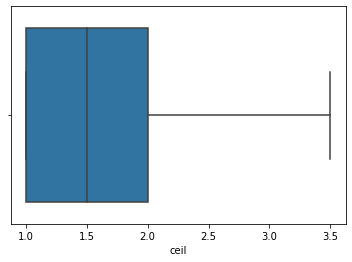

In [68]:
sns.boxplot(x = 'ceil', data = df)
plt.show()

In [62]:
df['condition'].describe()

count    21528.000000
mean         3.409327
std          0.650709
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

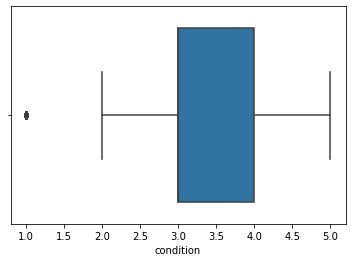

In [70]:
sns.boxplot(x = 'condition', data = df)
plt.show()

In [63]:
df['total_area'].describe()

count    2.154500e+04
mean     1.719204e+04
std      4.162869e+04
min      1.423000e+03
25%      7.032000e+03
50%      9.575000e+03
75%      1.300000e+04
max      1.652659e+06
Name: total_area, dtype: float64

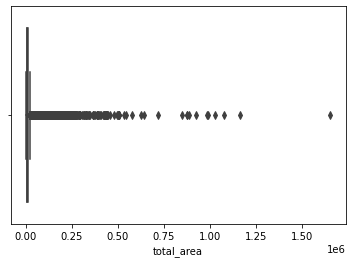

In [71]:
sns.boxplot(x = 'total_area', data = df)
plt.show()

In [64]:
df['living_measure15'].describe()

count    21447.000000
mean      1987.065557
std        685.519629
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: living_measure15, dtype: float64

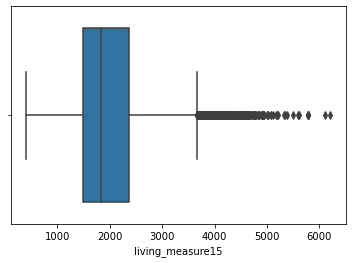

In [72]:
sns.boxplot(x = 'living_measure15', data = df)
plt.show()

In [73]:
df['living_measure'].describe()

count    21596.000000
mean      2079.860761
std        918.496121
min        290.000000
25%       1429.250000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

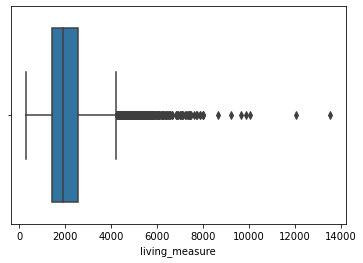

In [74]:
sns.boxplot(x = 'living_measure', data = df)
plt.show()

In [75]:
df['room_bed'].describe()

count    21505.000000
mean         3.371355
std          0.930289
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: room_bed, dtype: float64

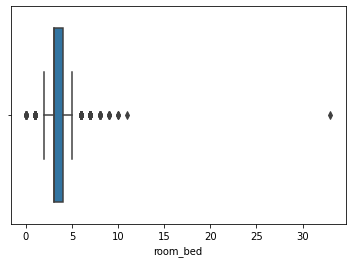

In [76]:
sns.boxplot(x = 'room_bed', data = df)
plt.show()

In [77]:
df['room_bath'].describe()

count    21505.000000
mean         2.115171
std          0.770248
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: room_bath, dtype: float64

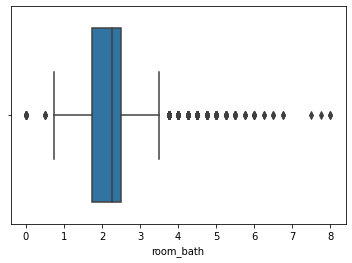

In [78]:
sns.boxplot(x = 'room_bath', data = df)
plt.show()

In [79]:
df['sight'].describe()

count    21556.000000
mean         0.234366
std          0.766438
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: sight, dtype: float64

In [81]:
df['lot_measure'].describe()

count    2.157100e+04
mean     1.510458e+04
std      4.142362e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068450e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

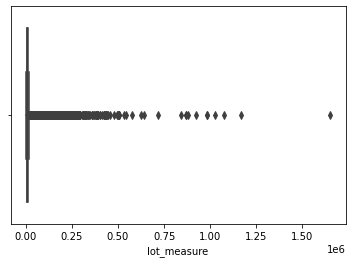

In [82]:
sns.boxplot(x = 'lot_measure', data = df)
plt.show()

In [83]:
df['lot_measure15'].describe()

count     21584.000000
mean      12766.543180
std       27286.987107
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10087.000000
max      871200.000000
Name: lot_measure15, dtype: float64

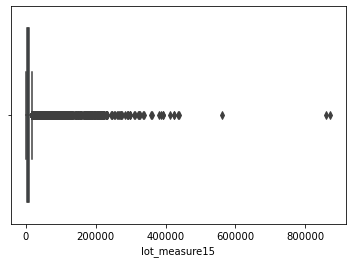

In [84]:
sns.boxplot(x = 'lot_measure15', data = df)
plt.show()

In [85]:
df['coast'].describe()

count    21582.00000
mean         0.00746
std          0.08605
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: coast, dtype: float64

In [88]:
df['coast'].value_counts()

0.0    21421
1.0      161
Name: coast, dtype: int64

In [90]:
# Removing missing values from continuous features
for col in ['living_measure', 'living_measure15', 'room_bed', 'room_bath', 'lot_measure', 'ceil',
           'total_area', 'lot_measure15', 'sight', 'quality','ceil_measure', 'yr_built', 'condition']:
    df[col] = df[col].fillna(df[col].median())

In [91]:
# Performing feature Engineering on the categorical Columns
df['basement'] = df['basement'].apply(lambda x: 0 if x == 0 else 1)
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['furnished'] = df['furnished'].apply(lambda x: 0 if x == 0 else 1)
df['coast'] = df['coast'].apply(lambda x: 0 if x == 0 else 1)
df['dayhours'] = [x.strip().replace('T000000', '') for x in df['dayhours']]
df['sales_year'] = df['dayhours'].str[0:4]
df['sales_year'] = df['sales_year'].astype('int64')

In [92]:
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
sales_year          0
dtype: int64

In [113]:
plt.figure(figsize=(40, 80), dpi = 400)
columns =['living_measure', 'living_measure15', 'price', 'lot_measure',
           'total_area', 'lot_measure15','ceil_measure', 'yr_built]
for i in range(len(columns)):
    plt.subplot(10, 2, i+1)
    sns.boxplot(data = df, x = df[columns[i]])
    plt.title(f'Boxplot - {columns[i]}', fontdict = {'fontsize': 30})
    plt.xlabel(columns[i],fontsize = 30)
    plt.tight_layout()
    plt.savefig('Uni_Boxplot.png', bbox_inches = 'tight')

In [98]:
corr = df.corr()

In [109]:
plt.figure(figsize = (25, 20), dpi = 400)
sns.heatmap(corr, annot = True)
plt.savefig('Bi_Heat_map.png', bbox_inches = 'tight')

In [116]:
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

In [137]:
scaled_df=scaler.fit_transform(df)
scaled_df

array([[-0.24481169,  1.47061003,  0.16283444, ..., -0.49655637,
        -0.11255015,  1.44790136],
       [-0.49876647,  1.4458156 , -0.95325602, ..., -0.49655637,
        -0.32232114,  1.44790136],
       [ 0.8861472 , -0.69484555,  0.53032765, ..., -0.49655637,
        -0.28180568, -0.69065478],
       ...,
       [-1.44489272, -0.67568621,  1.24625885, ...,  2.01387003,
         0.50413182, -0.69065478],
       [ 0.93095757,  1.42079576, -0.75725965, ..., -0.49655637,
        -0.18785502,  1.44790136],
       [ 1.46900759, -0.60265534,  1.66002898, ...,  2.01387003,
        -0.24908535, -0.69065478]])

In [136]:
 df['long'].replace('$', np.NaN, inplace = True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  float64
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  float64
 6   lot_measure       21613 non-null  float64
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  float64
 10  condition         21613 non-null  float64
 11  quality           21613 non-null  float64
 12  ceil_measure      21613 non-null  float64
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [138]:
scaled_df = pd.DataFrame(scaled_df, index=df.index,columns=df.columns)
scaled_df.head()

cid  dayhours     price  room_bed  room_bath  living_measure  \
0 -0.244812  1.470610  0.162834  0.679192  -0.476136        1.056797   
1 -0.498766  1.445816 -0.953256 -1.475263  -1.452238       -1.535440   
2  0.886147 -0.694846  0.530328  0.679192   0.825334        1.045905   
3  0.958776 -0.652019 -0.770871 -0.398035   0.499967       -0.370022   
4  1.171563  1.423501 -0.245491 -1.475263  -1.452238       -1.045311   

   lot_measure      ceil      coast     sight  condition   quality  \
0    -0.136528 -0.916786  -0.094674 -0.305352  -0.627337  0.291953   
1    -0.289704 -0.916786  -0.094674 -0.305352   0.911318 -1.409540   
2    -0.306281  0.938504  10.562562  4.919970  -0.627337  0.291953   
3    -0.274722  0.938504  -0.094674 -0.305352  -0.627337  0.291953   
4    -0.253724 -0.916786  -0.094674 -0.305352  -0.627337 -0.558793   

   ceil_measure  basement  yr_built  yr_renovated   zipcode       lat  \
0      0.014062  1.243503 -0.170697     -0.210135 -0.821247  1.174559   
1     -1.350564 -0.804180 -0.783718     -0.210135  0.748736 -0.039351   
2      1.511527 -0.804180 -0.170697     -0.210135  0.748736 -0.297722   
3     -0.058396 -0.804180  1.293744     -0.210135 -1.419335 -1.614836   
4     -0.807129 -0.804180 -1.601080     -0.210135  0.748736  0.045088   

       long  living_measure15  lot_measure15  furnished  total_area  \
0  0.218959          0.049875      -0.150342  -0.496556   -0.112550   
1 -0.427049         -0.477222      -0.317567  -0.496556   -0.322321   
2 -0.299267          0.928369      -0.378699  -0.496556   -0.281806   
3  0.005989          0.064517      -0.328789  -0.496556   -0.281661   
4 -0.505138         -1.267867      -0.280895  -0.496556   -0.275671   

   sales_year  
0    1.447901  
1    1.447901  
2   -0.690655  
3   -0.690655  
4    1.447901

In [139]:
df_model = df.copy()

In [140]:
df_final_model = df_model.drop(['cid','yr_renovated','zipcode','lat','long', 'dayhours'],axis=1)

In [141]:
df_final_model.shape

(21613, 18)

In [142]:
X = df_final_model.drop("price" , axis=1)
y = df_final_model["price"]

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

In [145]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12156, 17)
(5404, 17)
(4053, 17)


In [146]:
from sklearn.neighbors import KNeighborsRegressor

In [235]:
knn1 = KNeighborsRegressor(n_neighbors=6, weights = 'distance')

In [236]:
knn1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [237]:
y_knn1_predtr= knn1.predict(X_train)
y_knn1_predtst= knn1.predict(X_test)
y_knn1_predvl= knn1.predict(X_val)

In [238]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [239]:
knn1_trscore=r2_score(y_train,y_knn1_predtr)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_trMSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_trMAE=mean_absolute_error(y_train, y_knn1_predtr)

In [240]:
knn1_tstscore=r2_score(y_test,y_knn1_predtst)
knn1_tstRMSE=np.sqrt(mean_squared_error(y_test, y_knn1_predtst))
knn1_tstMSE=mean_squared_error(y_test, y_knn1_predtst)
knn1_tstMAE=mean_absolute_error(y_test, y_knn1_predtst)

In [241]:
knn1_vlscore=r2_score(y_val,y_knn1_predvl)
knn1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_knn1_predvl))
knn1_vlMSE=mean_squared_error(y_val, y_knn1_predvl)
knn1_vlMAE=mean_absolute_error(y_val, y_knn1_predvl)

In [242]:
knn6_df=pd.DataFrame({'Method':['knn1'],'ValScore':knn1_vlscore,'RMSE_vl': knn1_vlRMSE, 'MSE_vl': knn1_vlMSE,
'MAE_vl': knn1_vlMAE,'train Score':knn1_trscore,'RMSE_tr':
knn1_trRMSE, 'MSE_tr': knn1_trMSE, 'MAE_tr': knn1_trMAE,'testScore':knn1_tstscore,'RMSE_tst': knn1_tstRMSE, 'MSE_tst': knn1_tstMSE,
'MAE_tst': knn1_tstMAE})

In [197]:
knn1_df

Method  ValScore        RMSE_vl        MSE_vl         MAE_vl  train Score  \
0   knn1  0.189634  309608.502581  9.585742e+10  195471.932396     0.999879   

       RMSE_tr        MSE_tr      MAE_tr  testScore       RMSE_tst  \
0  4098.090975  1.679435e+07  103.662636   0.271926  318003.840534   

        MSE_tst        MAE_tst  
0  1.011264e+11  200207.234086

In [206]:
knn2_df

Method  ValScore        RMSE_vl        MSE_vl         MAE_vl  train Score  \
0   knn1  0.348886  277524.144819  7.701965e+10  176870.096985     0.999939   

       RMSE_tr        MSE_tr      MAE_tr  testScore       RMSE_tst  \
0  2897.787919  8.397175e+06  103.662636   0.416207  284756.852219   

        MSE_tst       MAE_tst  
0  8.108646e+10  176820.75586

In [215]:
knn3_df

Method  ValScore        RMSE_vl        MSE_vl         MAE_vl  train Score  \
0   knn1  0.412741  263564.562972  6.946628e+10  168311.884129     0.999939   

       RMSE_tr        MSE_tr      MAE_tr  testScore       RMSE_tst  \
0  2897.787919  8.397175e+06  103.662636    0.46157  273469.688068   

        MSE_tst        MAE_tst  
0  7.478567e+10  168096.232673

In [224]:
knn4_df

Method  ValScore        RMSE_vl        MSE_vl         MAE_vl  train Score  \
0   knn1  0.447392  255670.668357  6.536749e+10  162639.854162     0.999939   

       RMSE_tr        MSE_tr      MAE_tr  testScore       RMSE_tst  \
0  2897.787919  8.397175e+06  103.662636   0.482127  268198.606223   

        MSE_tst        MAE_tst  
0  7.193049e+10  163340.810893

In [234]:
knn5_df

Method  ValScore        RMSE_vl        MSE_vl         MAE_vl  train Score  \
0   knn1  0.463151  251998.556636  6.350327e+10  159734.439952     0.999939   

       RMSE_tr        MSE_tr      MAE_tr  testScore       RMSE_tst  \
0  2897.787919  8.397175e+06  103.662636   0.487537  266794.062052   

        MSE_tst        MAE_tst  
0  7.117907e+10  160503.822038

In [243]:
knn6_df

Method  ValScore        RMSE_vl        MSE_vl         MAE_vl  train Score  \
0   knn1  0.479581  248112.517442  6.155982e+10  157689.948327     0.999939   

       RMSE_tr        MSE_tr      MAE_tr  testScore    RMSE_tst       MSE_tst  \
0  2897.787919  8.397175e+06  103.662636   0.487297  266856.456  7.121237e+10   

         MAE_tst  
0  159285.965546